In [15]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

class AdalineGD:
    """ADAptive LInear NEuron classifier.
    
    Parameters
    -----------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.
    random_state : int
        Random number generator seed for random weight initialization.
    
    Attributes
    ----------
    w_ : 1d-array
        Weights after fitting.
    b_ : Scalar
        Bias unit after fitting.
    losses_ : list
      Mean squared error loss function values in each epoch. 
    
    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X, y):
        """ Fit training data.
     Parameters
        ---------
        X : {array-like}, shape = [n_examples, n_features]
            Training vectors, where n_examples
            is the number of examples and
            n_features is the number of features.
        y : array-like, shape = [n_examples]
            Target values.
        ReturnsL
        ------
        self : object
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01,
                              size=X.shape[1])
        self.b_ = np.float64(0.)
        self.losses_ = []
        for i in range(self.n_iter):
                    net_input = self.net_input(X)
                    output = self.activation(net_input)
                    errors = (y - output)
                    self.w_ += self.eta * 2.0 * X.T.dot(errors) / X.shape[0]
                    self.b_ += self.eta * 2.0 * errors.mean()
                    loss = (errors**2).mean()
                    self.losses_.append(loss)
        return self
        
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_
    
    def activation(self, X):
        """Compute linear activation"""
        return X
    
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X))
                                >= 0.5, 1, 0)

From URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


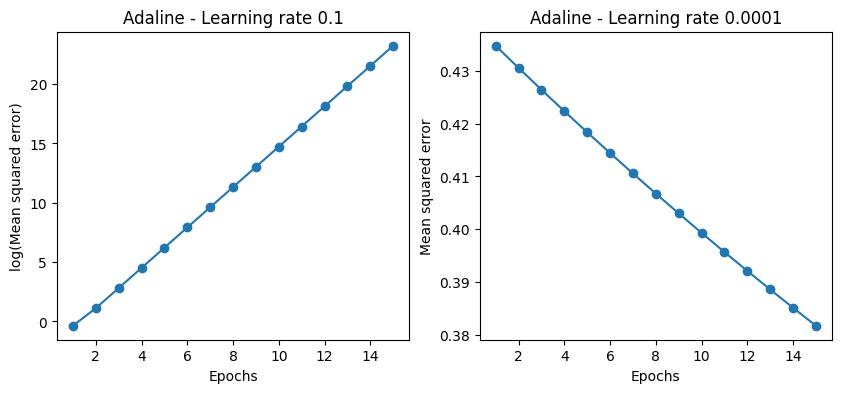

In [16]:
s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
print('From URL:', s)
df = pd.read_csv(s, header=None, encoding='utf-8')
df.tail()
# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 0, 1)
# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values



fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
ada1 = AdalineGD(n_iter=15, eta=0.1).fit(X, y)
ax[0].plot(range(1, len(ada1.losses_) + 1), np.log10(ada1.losses_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Mean squared error)')
ax[0].set_title('Adaline - Learning rate 0.1')
ada2 = AdalineGD(n_iter=15, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.losses_) + 1), ada2.losses_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Mean squared error')
ax[1].set_title('Adaline - Learning rate 0.0001')
plt.show()

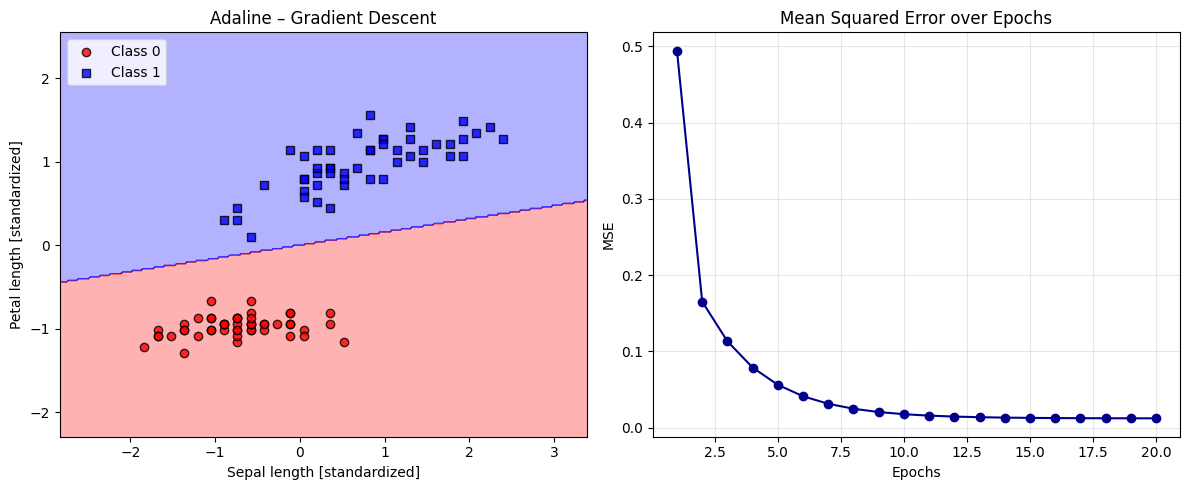

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

# ── Updated plot_decision_regions function ──
def plot_decision_regions(X, y, classifier, resolution=0.02, ax=None):
    if ax is None:
        ax = plt.gca()
    
    # Marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # Decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    # Predict on grid
    grid_points = np.array([xx1.ravel(), xx2.ravel()]).T
    lab = classifier.predict(grid_points)
    lab = lab.reshape(xx1.shape)
    
    # Plot contour
    ax.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    ax.set_xlim(xx1.min(), xx1.max())
    ax.set_ylim(xx2.min(), xx2.max())
    
    # Plot class samples with labels
    for idx, cl in enumerate(np.unique(y)):
        mask = y == cl
        ax.scatter(
            X[mask, 0],
            X[mask, 1],
            alpha=0.8,
            c=colors[idx],
            marker=markers[idx],
            label=f'Class {cl}',
            edgecolor='black'
        )

# ── Assuming X and y are already defined earlier in your notebook ──
# Example (uncomment if needed for testing):
# X = df.iloc[0:100, [0, 2]].values
# y = np.where(df.iloc[0:100, 4].values == 'Iris-setosa', 0, 1)

# Standardization
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

# Train Adaline
ada_gd = AdalineGD(n_iter=20, eta=0.5)
ada_gd.fit(X_std, y)

# ── Side-by-side plots ──
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Left: Decision regions
plot_decision_regions(X_std, y, classifier=ada_gd, ax=ax1)
ax1.set_title('Adaline – Gradient Descent')
ax1.set_xlabel('Sepal length [standardized]')
ax1.set_ylabel('Petal length [standardized]')
ax1.legend(loc='upper left')

# Right: Loss curve
ax2.plot(range(1, len(ada_gd.losses_) + 1), ada_gd.losses_, marker='o', color='darkblue')
ax2.set_title('Mean Squared Error over Epochs')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('MSE')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()